Importing Main libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import cv2 as cv
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,  accuracy_score

Function to load images from a directory

In [2]:
import cv2
import os
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

# Task 1

In [3]:
df = pd.read_csv(r"Data_labels.csv")

In [4]:
df

,Image_name,level
0,IMG_1,4
1,IMG_2,4
2,IMG_3,4
3,IMG_4,4
4,IMG_5,4
...,...,...
511,IMG_512,2
512,IMG_513,2
513,IMG_514,2
514,IMG_515,2


In [5]:
path = "D:\Anas Degree\sem6\DataMining\Images-20220604T051514Z-001\Images\\"

Loading Images and resize as 32 bit  and append in nummpy array data

In [6]:
data = []
path = "D:\Anas Degree\sem6\DataMining\Images-20220604T051514Z-001\Images\\"
IMG_SIZE = 32
for file in os.listdir(path):
    img=cv2.imread(path+file)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    img=img.astype('float32')
    data.append(img)
data = np.array(data)

printing Labels against each Image

In [7]:
data_label = np.array(df['level'])

In [8]:
data_label

array([4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3,
       2, 2, 3, 3, 3, 2, 0, 0, 3, 4, 2, 3, 3, 3, 0, 0, 0, 4, 0, 3, 0, 0,
       0, 2, 0, 4, 2, 0, 2, 0, 4, 0, 0, 0, 4, 0, 2, 3, 4, 4, 1, 3, 2, 3,
       2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 4, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 3, 3, 2, 3, 4, 4, 4,
       4, 3, 4, 3, 3, 3, 4, 4, 2, 4, 2, 2, 2, 1, 4, 3, 4, 3, 3, 4, 4, 2,
       4, 4, 4, 4, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2,
       2, 4, 4, 3, 2, 3, 2, 2, 2, 2, 4, 2, 2, 3, 3, 4, 2, 2, 4, 2, 2, 2,
       2, 3, 2, 3, 2, 1, 2, 4, 2, 2, 2, 2, 4, 2, 3, 4, 4, 2, 2, 2, 2, 3,
       4, 2, 3, 3, 4, 3, 2, 2, 4, 1, 2, 2, 3, 2, 3, 4, 3, 2, 3, 3, 2, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 2,
       0, 2, 2, 2, 2, 4, 0, 2, 3, 0, 1, 0, 2, 0, 1,

Normalizing pixels values of Images between 0 and 1 and reshaped it

In [9]:
data = data/255.0
reshaped_data = data.reshape(len(data),-1)

In [10]:
len(reshaped_data)

516

In [11]:
len(reshaped_data[0])

3072

In [12]:
reshaped_data.shape = (516,3072)

In [13]:
reshaped_data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03529412, 0.        , 0.        , ..., 0.01568628, 0.        ,
        0.        ],
       [0.00784314, 0.00392157, 0.01176471, ..., 0.00784314, 0.00392157,
        0.01176471],
       ...,
       [0.00784314, 0.00392157, 0.01176471, ..., 0.00784314, 0.00392157,
        0.01176471],
       [0.00392157, 0.        , 0.00784314, ..., 0.01176471, 0.        ,
        0.00784314],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

Function to map label from cluster to original labels and Mapping predictions to original labels

In [14]:
# mapping labels from cluster to original labels
def get_reference_dict(clusters,data_label):
    reference_label = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        num = np.bincount(data_label[index==1]).argmax()
        reference_label[i] = num
    return reference_label
# Mapping predictions to original labels
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = reference_labels[clusters[i]]
    return temp_labels

# Elbow Method

Accuracy for k = 2:  0.3798449612403101
Accuracy for k = 4:  0.3856589147286822
Accuracy for k = 6:  0.38953488372093026
Accuracy for k = 8:  0.3856589147286822


Text(0, 0.5, 'Sum of squared distance')

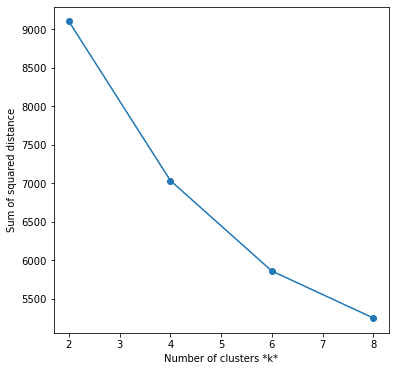

In [15]:
sse = []
list_k = [2,4,6,8]
for k in list_k:
    km = KMeans(n_clusters=k)
    clusters = km.fit_predict(reshaped_data)
    sse.append(km.inertia_)
    reference_labels = get_reference_dict(clusters,data_label)
    predicted_labels = get_labels(clusters,reference_labels)
    print(f"Accuracy for k = {k}: ", accuracy_score(predicted_labels,data_label))
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

So we can take k=4,

In [16]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(reshaped_data)
centroids=kmeans.cluster_centers_.shape

Plotting clusters in different colos and check how they are mixup with each other 

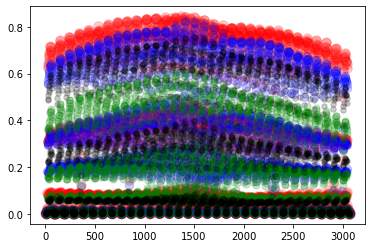

In [17]:
x_data = [i for i in range(reshaped_data.shape[1])]
plt.scatter(x_data,kmeans.cluster_centers_[0], color = 'red',alpha=0.2,s=90)
plt.scatter(x_data,kmeans.cluster_centers_[1], color = 'blue',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[2], color = 'green',alpha=0.2,s=50)
plt.scatter(x_data,kmeans.cluster_centers_[3], color = 'black',alpha=0.2,s=30)

Calculating accuracy  after applying K mean clustering 

In [18]:
reference_labels = get_reference_dict(clusters,data_label)
predicted_labels = get_labels(clusters,reference_labels)
print(accuracy_score(predicted_labels,data_label))

0.38372093023255816


In [19]:
clusters

array([2, 1, 3, 3, 0, 3, 0, 0, 3, 3, 1, 3, 2, 2, 2, 2, 0, 3, 1, 1, 2, 0,
       3, 3, 3, 2, 2, 0, 0, 1, 3, 3, 2, 2, 0, 3, 3, 3, 2, 3, 0, 0, 3, 2,
       0, 0, 3, 1, 3, 0, 3, 3, 2, 3, 1, 1, 3, 1, 3, 0, 0, 3, 3, 3, 0, 1,
       2, 3, 1, 3, 3, 0, 1, 1, 3, 3, 3, 0, 2, 3, 3, 1, 3, 3, 3, 0, 0, 3,
       3, 1, 0, 1, 3, 3, 1, 1, 3, 2, 2, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 2, 0, 1, 0, 3, 3, 0, 1, 2, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 1, 3,
       3, 0, 0, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 2, 0, 3, 2, 0, 0, 0, 3,
       3, 2, 3, 2, 3, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 0, 2, 3, 2, 3, 2, 0, 3, 3, 3, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 3, 3, 2, 1, 0, 2, 0, 2, 1, 1, 1, 3, 3, 3, 0, 0, 0, 3, 3,
       1, 1, 3, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 3, 3, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 0, 3, 1, 1, 1, 0, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 3, 0, 2, 3, 3, 1, 0, 1, 1, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 3, 1, 1, 3, 3, 0, 0, 1, 0, 0, 1,

In [20]:
df['Cluster_assighned']=clusters

Place cluster value  assighned against each Image 

In [21]:
df.head()

,Image_name,level,Cluster_assighned
0,IMG_1,4,2
1,IMG_2,4,1
2,IMG_3,4,3
3,IMG_4,4,3
4,IMG_5,4,0


Split and make subplot of each cluster

In [22]:
cluster1=df[df['Cluster_assighned']==0]
cluster2=df[df['Cluster_assighned']==1]
cluster3=df[df['Cluster_assighned']==2]
cluster4=df[df['Cluster_assighned']==3]

Deduct 30 percent rows from each cluter

In [23]:
cluster1=cluster1.iloc[:-(int(cluster1.shape[0]*0.3))]
cluster2=cluster2.iloc[:-(int(cluster2.shape[0]*0.3))]
cluster3=cluster3.iloc[:-(int(cluster3.shape[0]*0.3))]
cluster4=cluster4.iloc[:-(int(cluster4.shape[0]*0.3))]

In [24]:
int(cluster1.shape[0]*0.7)

65

In [25]:
clustersList = [cluster1,cluster2,cluster3,cluster4]

In [26]:
cluster1.shape

(93, 3)

Concat all cluters and form a final preprocessed Dataset

In [27]:
Final_DataFrame = pd.concat(clustersList,ignore_index=True)

In [28]:
Final_DataFrame.head()

,Image_name,level,Cluster_assighned
0,IMG_5,4,0
1,IMG_7,3,0
2,IMG_8,2,0
3,IMG_17,2,0
4,IMG_22,3,0


In [29]:
final_lst=Final_DataFrame['Image_name'].tolist()

# Task-2

Do Segmentation by first loading image in gray scal and than blur it , then apply canny edge detecter to extract main features and than apply Knn segmentation algorithm  and save all the images in a directory 

In [30]:
SegementedImages_path = "D:\Anas Degree\sem6\DataMining\Images-20220604T051514Z-001\segmentedImages"

# Segmentation

In [31]:
# for file in final_lst:
#     img=cv2.imread(path+file+'.jpg', cv2.IMREAD_GRAYSCALE)
#     img=cv2.resize(img,(1024,1024))
#     blur = cv2.GaussianBlur(img, (3,3), 0)
#     edges = cv.Canny(blur,0,20)
#     pixel_vals = np.float32(edges)
#     criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
#     k = 4
#     retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#     centers = np.uint8(centers)
#     segmented_data = centers[labels.flatten()]
#     segmented_image = segmented_data.reshape((pixel_vals.shape))
#     cv2.imwrite(os.path.join(SegementedImages_path , file+'.jpg'), edges)
#     cv2.waitKey(0)
# #     plt.imshow(edges,cmap = 'gray')
# #     plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
# #     plt.show()

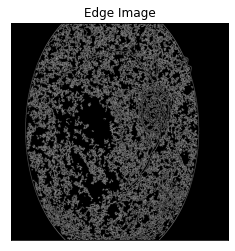

In [31]:
for file in final_lst:
    img=cv2.imread(path+file+'.jpg', cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(1024,1024))
    blur = cv2.GaussianBlur(img, (3,3), 0)
    edges = cv.Canny(blur,0,20)
    pixel_vals = np.float32(edges)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    k = 4
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    segmented_image = segmented_data.reshape((pixel_vals.shape))
    plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    break

In [32]:
y=Final_DataFrame['level']

# Task3

Loading images before Segmentation and append in X

In [33]:
X=[]
for file in final_lst:
    img=cv2.imread(path+file+'.jpg')
    img=cv2.resize(img,(128,128))
    X.append(img)

Loading images after Segmentation and append in X1

In [34]:
X1=[]
for file in final_lst:
    img=cv2.imread(SegementedImages_path+'\\'+file+'.jpg')
    img=cv2.resize(img,(128,128))
    X1.append(img)

Splitting dataset

In [35]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.20,random_state=10,shuffle=True)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(290, 128, 128, 3)
(73, 128, 128, 3)
(290,)
(73,)


In [37]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(np.array(X1), y, test_size=0.20,random_state=10,shuffle=True)

In [38]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape) 
print(y_test1.shape)

(290, 128, 128, 3)
(73, 128, 128, 3)
(290,)
(73,)


reshaping data and placing into rows

In [39]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(290, 49152) (73, 49152)


In [40]:
X_train1 = np.reshape(X_train1, (X_train1.shape[0], -1))
X_test1 = np.reshape(X_test1, (X_test1.shape[0], -1))
print(X_train1.shape, X_test1.shape)

(290, 49152) (73, 49152)


In [41]:
X_train1 = (X_train1 / 255).astype(int)
X_test1 = (X_test1 / 255).astype(int)

Use standardScaler to transform Train and Test dataset

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform (X_test1)

# Stochastic Gradient Descent

### For Initial Dataset

In [43]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=2, max_iter=10, tol=1e-3)
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=10, random_state=2)

In [44]:
y_pred = sgd_clf.predict(X_test)
print(classification_report(y_test1,y_pred))
print('Accuracy: ', 100*np.sum(y_pred == y_test)/len(y_test))

              precision    recall  f1-score   support

           0       0.37      0.91      0.53        23
           1       0.00      0.00      0.00         4
           2       0.50      0.04      0.07        26
           3       0.27      0.23      0.25        13
           4       0.00      0.00      0.00         7

    accuracy                           0.34        73
   macro avg       0.23      0.24      0.17        73
weighted avg       0.34      0.34      0.24        73

Accuracy:  34.24657534246575


### For Segmented DataSet

In [45]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=2, max_iter=20, tol=1e-3)
sgd_clf.fit(X_train1, y_train1)

SGDClassifier(max_iter=20, random_state=2)

In [46]:
y_pred = sgd_clf.predict(X_test1)
print(classification_report(y_test1,y_pred))
print('Accuracy: ', 100*np.sum(y_pred == y_test1)/len(y_test1))

              precision    recall  f1-score   support

           0       0.62      0.22      0.32        23
           1       0.00      0.00      0.00         4
           2       0.36      0.81      0.50        26
           3       0.25      0.08      0.12        13
           4       0.00      0.00      0.00         7

    accuracy                           0.37        73
   macro avg       0.25      0.22      0.19        73
weighted avg       0.37      0.37      0.30        73

Accuracy:  36.986301369863014


# Logistic Regression

### For Initial Dataset

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
predictions =  clf.predict(X_test)

In [48]:
print(classification_report(y_test,predictions))
print("Accuracy:",accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        23
           1       0.00      0.00      0.00         4
           2       0.62      0.58      0.60        26
           3       0.33      0.38      0.36        13
           4       0.25      0.29      0.27         7

    accuracy                           0.53        73
   macro avg       0.37      0.40      0.38        73
weighted avg       0.51      0.53      0.52        73

Accuracy: 0.5342465753424658


### For Segmented DataSet

In [49]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train1, y_train1)
predictions =  clf.predict(X_test1)

In [50]:
print(classification_report(y_test1,predictions))
print("Accuracy:",accuracy_score(y_test1, predictions))

              precision    recall  f1-score   support

           0       0.62      0.22      0.32        23
           1       0.00      0.00      0.00         4
           2       0.37      0.85      0.52        26
           3       0.25      0.08      0.12        13
           4       0.00      0.00      0.00         7

    accuracy                           0.38        73
   macro avg       0.25      0.23      0.19        73
weighted avg       0.37      0.38      0.31        73

Accuracy: 0.3835616438356164


In [51]:
int(Final_DataFrame.shape[0]*0.2)

72

Below cell is splitting data in train and test and store with respect to labels

In [52]:
# import shutil
# src_path="D:\Anas Degree\sem6\DataMining\Images-20220604T051514Z-001\Images\\"
# des_path="D:\Anas Degree\sem6\DataMining\Images-20220604T051514Z-001\InitialImages\\"
# cnt=0
# trainingDatasetLength=int(Final_DataFrame.shape[0]*0.2)
# for i in Final_DataFrame.iterrows():
#     if cnt>trainingDatasetLength:
#         if i[1][1]==0:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'train\\'+'0\\'+i[1][0]+'.jpg')
#         if i[1][1]==1:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'train\\'+'1\\'+i[1][0]+'.jpg')
#         if i[1][1]==2:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'train\\'+'2\\'+i[1][0]+'.jpg')
#         if i[1][1]==3:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'train\\'+'3\\'+i[1][0]+'.jpg')
#         if i[1][1]==4:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'train\\'+'4\\'+i[1][0]+'.jpg')
    
#     else:
#         if i[1][1]==0:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'test\\'+'0\\'+i[1][0]+'.jpg')
#         if i[1][1]==1:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'test\\'+'1\\'+i[1][0]+'.jpg')
#         if i[1][1]==2:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'test\\'+'2\\'+i[1][0]+'.jpg')
#         if i[1][1]==3:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'test\\'+'3\\'+i[1][0]+'.jpg')
#         if i[1][1]==4:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'test\\'+'4\\'+i[1][0]+'.jpg')
#     cnt+=1

In [53]:
# import shutil
# src_path="D:\Anas Degree\sem6\DataMining\Images-20220604T051514Z-001\segmentedImages\\"
# des_path="D:\Anas Degree\sem6\DataMining\Images-20220604T051514Z-001\SegmentedImagesDataset\\"
# cnt=0
# trainingDatasetLength=int(Final_DataFrame.shape[0]*0.2)
# for i in Final_DataFrame.iterrows():
#     if cnt>trainingDatasetLength:
#         if i[1][1]==0:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'train\\'+'0\\'+i[1][0]+'.jpg')
#         if i[1][1]==1:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'train\\'+'1\\'+i[1][0]+'.jpg')
#         if i[1][1]==2:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'train\\'+'2\\'+i[1][0]+'.jpg')
#         if i[1][1]==3:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'train\\'+'3\\'+i[1][0]+'.jpg')
#         if i[1][1]==4:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'train\\'+'4\\'+i[1][0]+'.jpg')
    
#     else:
#         if i[1][1]==0:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'test\\'+'0\\'+i[1][0]+'.jpg')
#         if i[1][1]==1:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'test\\'+'1\\'+i[1][0]+'.jpg')
#         if i[1][1]==2:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'test\\'+'2\\'+i[1][0]+'.jpg')
#         if i[1][1]==3:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'test\\'+'3\\'+i[1][0]+'.jpg')
#         if i[1][1]==4:
#             shutil.copyfile(src_path+i[1][0]+'.jpg', des_path+'test\\'+'4\\'+i[1][0]+'.jpg')
#     cnt+=1

# CNN

In [54]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

In [55]:


class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()+0.45}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [56]:
class NaturalSceneClassification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(82944,1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512,6)
        )
    
    def forward(self, xb):
        return self.network(xb)

In [57]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

  
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

  
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    
    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

### For Initial Dataset

In [58]:
#train and test data directory
data_dir = r"D:\Anas Degree\sem6\DataMining\Images-20220604T051514Z-001\InitialImages\train\\"
test_data_dir = r"D:\Anas Degree\sem6\DataMining\Images-20220604T051514Z-001\InitialImages\test\\"


#load the train and test data
dataset = ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))
test_dataset = ImageFolder(test_data_dir,transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

In [59]:
img, label = dataset[0]
print(img.shape,label)

torch.Size([3, 150, 150]) 0


In [60]:
print("Follwing classes are there : \n",dataset.classes)

Follwing classes are there : 
 ['0', '1', '2', '3', '4']


Label : 0


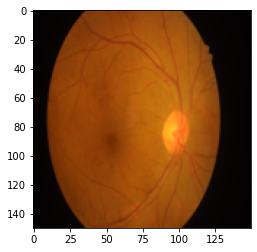

In [61]:
def display_img(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*dataset[0])

In [62]:
batch_size = 18
val_size = 30
train_size = len(dataset) - val_size 

train_data,val_data = random_split(dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)

Length of Train Data : 260
Length of Validation Data : 30


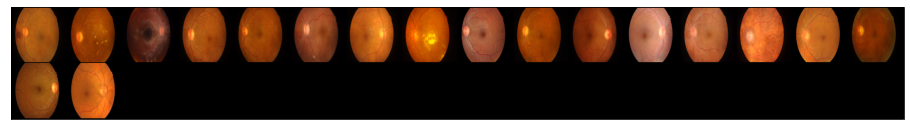

In [63]:
def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

In [64]:
model=NaturalSceneClassification()

In [65]:
num_epochs = 20
opt_func = torch.optim.Adam
lr = 0.001
#fitting the model on training data and record the result after each epoch
history = fit(num_epochs, lr,model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 2.0082, val_loss: 1.5788, val_acc: 0.6500
Epoch [1], train_loss: 1.4828, val_loss: 1.4959, val_acc: 0.6500
Epoch [2], train_loss: 1.4355, val_loss: 1.4917, val_acc: 0.6500
Epoch [3], train_loss: 1.4322, val_loss: 1.5232, val_acc: 0.6500
Epoch [4], train_loss: 1.4380, val_loss: 1.4693, val_acc: 0.6500
Epoch [5], train_loss: 1.4304, val_loss: 1.4663, val_acc: 0.6500
Epoch [6], train_loss: 1.4572, val_loss: 1.5668, val_acc: 0.6500
Epoch [7], train_loss: 1.4509, val_loss: 1.4611, val_acc: 0.6500
Epoch [8], train_loss: 1.4245, val_loss: 1.5225, val_acc: 0.6500
Epoch [9], train_loss: 1.4292, val_loss: 1.4645, val_acc: 0.6500
Epoch [10], train_loss: 1.4322, val_loss: 1.4508, val_acc: 0.6500
Epoch [11], train_loss: 1.4198, val_loss: 1.4950, val_acc: 0.6500
Epoch [12], train_loss: 1.4478, val_loss: 1.4508, val_acc: 0.6500
Epoch [13], train_loss: 1.4291, val_loss: 1.4913, val_acc: 0.6500
Epoch [14], train_loss: 1.4377, val_loss: 1.4651, val_acc: 0.6500
Epoch [15], train_lo

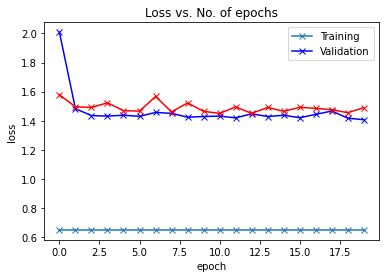

In [66]:
def plot_accuracies(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    

plot_accuracies(history)

def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

### For Segmented Dataset

In [67]:
#train and test data directory
data_dir = r"D:\Anas Degree\sem6\DataMining\Images-20220604T051514Z-001\SegmentedImagesDataset\train"
test_data_dir = r"D:\Anas Degree\sem6\DataMining\Images-20220604T051514Z-001\SegmentedImagesDataset\test"


#load the train and test data
dataset = ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))
test_dataset = ImageFolder(test_data_dir,transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

Label : 0


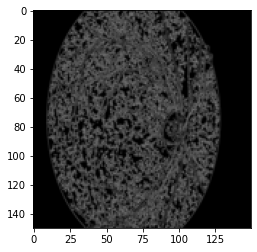

In [68]:
def display_img(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*dataset[0])

In [69]:
batch_size = 16
val_size = 30
train_size = len(dataset) - val_size 

train_data,val_data = random_split(dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)

Length of Train Data : 261
Length of Validation Data : 30


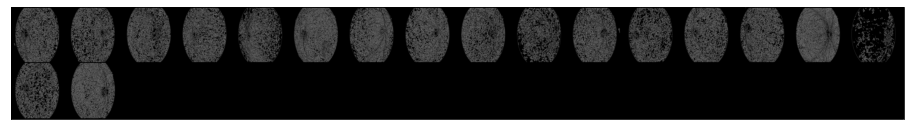

In [70]:
def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

In [71]:
model=NaturalSceneClassification()

In [74]:
num_epochs = 5
opt_func = torch.optim.Adam
lr = 0.001 
#fitting the model on training data and record the result after each epoch
history1 = fit(num_epochs, lr,model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.4524, val_loss: 1.5216, val_acc: 0.7167
Epoch [1], train_loss: 1.4373, val_loss: 1.5366, val_acc: 0.7167
Epoch [2], train_loss: 1.4203, val_loss: 1.5290, val_acc: 0.7167
Epoch [3], train_loss: 1.4252, val_loss: 1.4996, val_acc: 0.7167
Epoch [4], train_loss: 1.4363, val_loss: 1.5104, val_acc: 0.7167


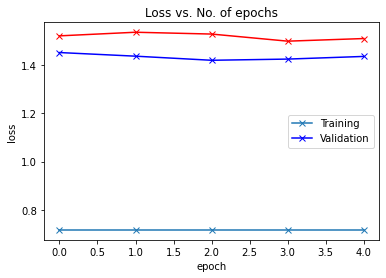

In [75]:
def plot_accuracies(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    

plot_accuracies(history1)

def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history1)

# ANN

In [79]:
class Net(nn.Module):
    def __init__(self,input,H,output):
        super(Net,self).__init__()
        self.linear1=nn.Linear(input,H)
        self.linear2=nn.Linear(H,500)
        self.linear3=nn.Linear(500,output)
 
        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=torch.sigmoid(self.linear2(x)) 
        x=self.linear3(x)
        return x

### Before Segmentation

In [76]:
x=[]
for i in range(len(X_train)):
    x.append(X_train[i].flatten())

x1=[]
for i in range(len(X_test)):
    x1.append(X_test[i].flatten())

In [77]:
x_traintensor=torch.tensor(x)
x_testtensor=torch.tensor(x1)
y_traintensor=torch.tensor(np.array(y_train))
y_testtensor=torch.tensor(np.array(y_test))

In [78]:
x_traintensor.shape
x_testtensor.shape

torch.Size([73, 49152])

In [96]:
clf=Net(49152,1200,5)

In [97]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(clf.parameters(), lr=0.1)

In [101]:
learning_rate = 1e-1
loss_list = []
for t in range(10):
    y_pred = clf(x_traintensor.float())
    loss = criterion(y_pred, y_traintensor.long())
    print(loss)
    loss_list.append(loss.item())
    clf.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in clf.parameters():
            param -= learning_rate * param.grad

tensor(1.4199, grad_fn=<NllLossBackward0>)
tensor(1.4199, grad_fn=<NllLossBackward0>)
tensor(1.4199, grad_fn=<NllLossBackward0>)
tensor(1.4199, grad_fn=<NllLossBackward0>)
tensor(1.4199, grad_fn=<NllLossBackward0>)
tensor(1.4199, grad_fn=<NllLossBackward0>)
tensor(1.4198, grad_fn=<NllLossBackward0>)
tensor(1.4199, grad_fn=<NllLossBackward0>)
tensor(1.4199, grad_fn=<NllLossBackward0>)
tensor(1.4199, grad_fn=<NllLossBackward0>)


### After Segmentation

In [106]:
x=[]
for i in range(len(X_train1)):
    x.append(X_train1[i].flatten())

x1=[]
for i in range(len(X_test1)):
    x1.append(X_test1[i].flatten())

In [107]:
x_traintensor=torch.tensor(x)
x_testtensor=torch.tensor(x1)
y_traintensor=torch.tensor(np.array(y_train1))
y_testtensor=torch.tensor(np.array(y_test1))

In [108]:
clf=Net(49152,1200,5)

In [109]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(clf.parameters(), lr=0.1)

In [110]:
learning_rate = 1e-1
loss_list = []
for t in range(10):
    y_pred = clf(x_traintensor.float())
    loss = criterion(y_pred, y_traintensor.long())
    print(loss)
    loss_list.append(loss.item())
    clf.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in clf.parameters():
            param -= learning_rate * param.grad

tensor(1.5457, grad_fn=<NllLossBackward0>)
tensor(1.6113, grad_fn=<NllLossBackward0>)
tensor(2.0714, grad_fn=<NllLossBackward0>)
tensor(2.3193, grad_fn=<NllLossBackward0>)
tensor(3.3835, grad_fn=<NllLossBackward0>)
tensor(2.6224, grad_fn=<NllLossBackward0>)
tensor(2.1595, grad_fn=<NllLossBackward0>)
tensor(2.7312, grad_fn=<NllLossBackward0>)
tensor(2.4539, grad_fn=<NllLossBackward0>)
tensor(1.4514, grad_fn=<NllLossBackward0>)
